In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig
import ipywidgets as iw
from importlib import resources
import vmlab

In [2]:
from vmlab.models import visual_model

This notebook aims to understand if the R scripts runned to estimate the missing radius is relevant and reaches indeed all the growth units. Moreover, the 3D computation shows qualitatively the difference of estimation quality bewteen the correction integrated in Vmango and the R script correction.

# Does the R script reach all NA values ?

In [3]:
def plot_graph_NA_rad(graph, width=7000,height=1000):
    layout = graph.layout_reingold_tilford()
    layout.rotate(180)
    return ig.plot(
        graph, 
        bbox=(0,0,width,height), 
        layout=layout, 
        vertex_label=graph.vs.get_attribute_values('id'), 
    vertex_label_size=10,
    vertex_color=['red' if r else 'palegreen' for r in np.isnan(graph.vs.get_attribute_values('growth__radius_gu'))]
    
    )

## TREE E13

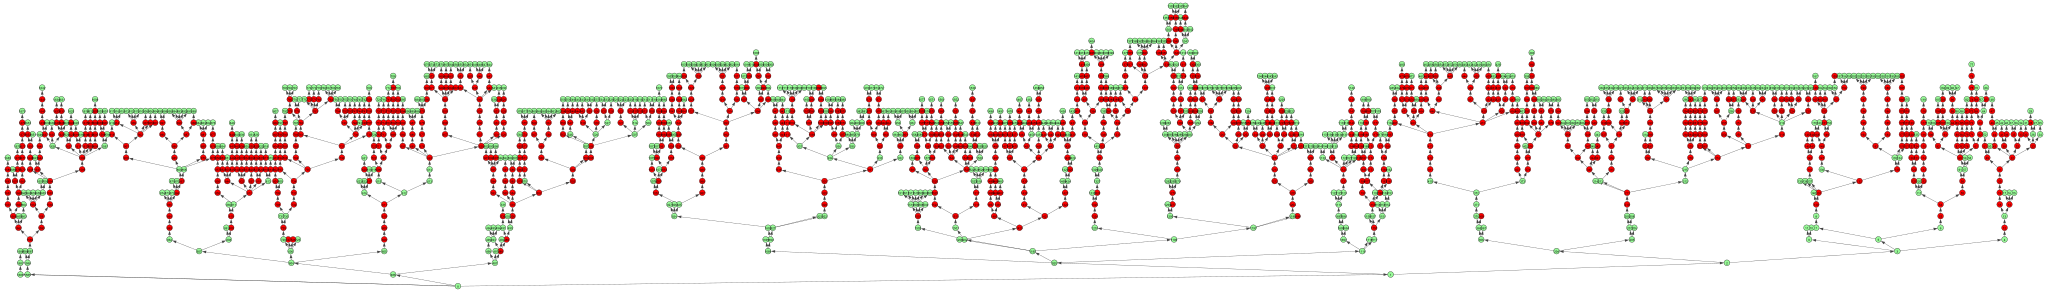

In [4]:
with resources.path('vmlab.data.trees', 'tree_E13_raw.csv') as path1:
    tree1 = pd.read_csv(path1)
    graph1 = vmlab.to_graph(tree1)
plot_graph_NA_rad(graph1,7000,1000)

In [5]:
setup1 = vmlab.create_setup(
    model=visual_model,
    tree=tree1,
    start_date='2002-06-01',
    end_date='2002-06-02',
    setup_toml='visual_model.toml',
    current_cycle=3,
    input_vars={
        'growth__leaf_senescence_enabled': False,
        'geometry__interpretation_freq': 1
    },
    output_vars={
    }
)

In [6]:
ds_out1 = vmlab.run(setup1, visual_model, geometry=True)

SceneWidget(scenes=[{'id': 'MmgxWYWHYre6G9hV1Pvh04V03', 'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5RPVVd\x00\x020\…

             0% | initialize 

d:\Mes Programmes\miniconda3\envs\vmango-lab\lib\site-packages\xarray\core\utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


In [7]:
tree1["growth__radius_gu"].isna().sum()

960

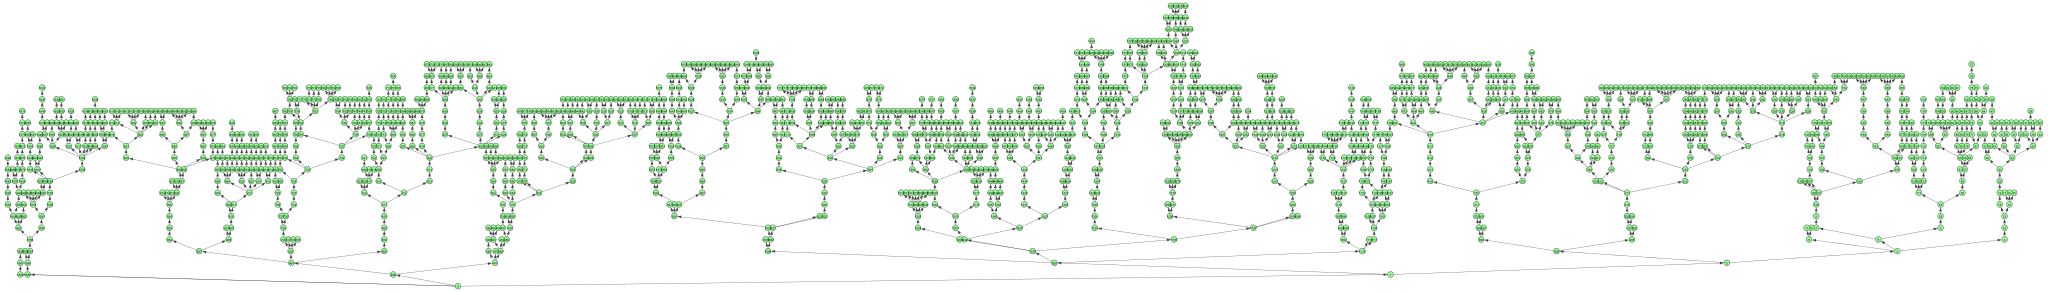

In [8]:
with resources.path('vmlab.data.trees', 'tree_E13_with_radius.csv') as path2:
    tree2 = pd.read_csv(path2)
    graph2 = vmlab.to_graph(tree2)
plot_graph_NA_rad(graph2)

In [9]:
tree2["growth__radius_gu"].isna().sum()

0

In [10]:
setup2 = vmlab.create_setup(
    model=visual_model,
    tree=tree2,
    start_date='2002-06-01',
    end_date='2002-06-02',
    setup_toml='visual_model.toml',
    current_cycle=3,
    input_vars={
        'growth__leaf_senescence_enabled': False,
        'geometry__interpretation_freq': 1
    },
    output_vars={
    }
)

In [11]:
ds_out3 = vmlab.run(setup2, visual_model, geometry=True)

SceneWidget(scenes=[{'id': 'cAsaJuok0DjJWJ8VlJpkIp9wc', 'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5RPVVd\x00\x020\…

             0% | initialize 

d:\Mes Programmes\miniconda3\envs\vmango-lab\lib\site-packages\xarray\core\utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


## TREE E16

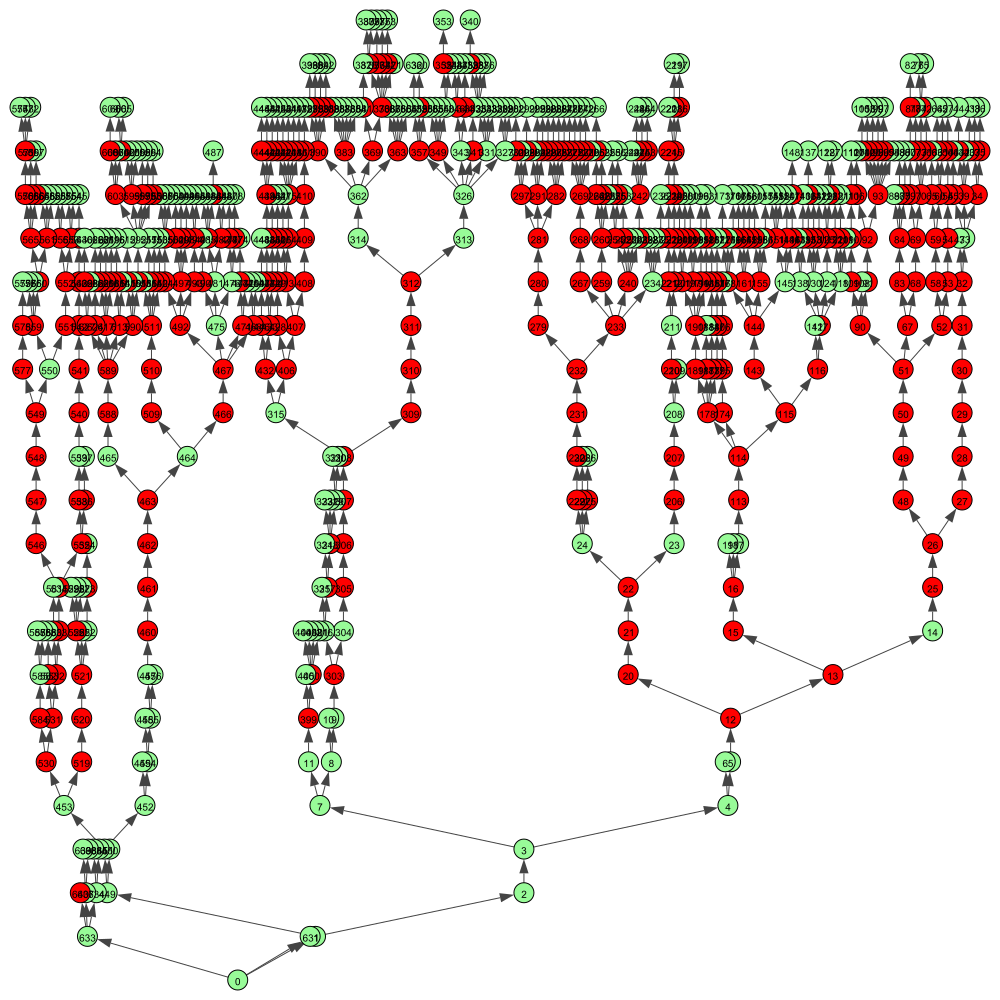

In [12]:
with resources.path('vmlab.data.trees', 'tree_E16_raw.csv') as path:
    tree = pd.read_csv(path)
    graph = vmlab.to_graph(tree)
plot_graph_NA_rad(graph,1000,1000)

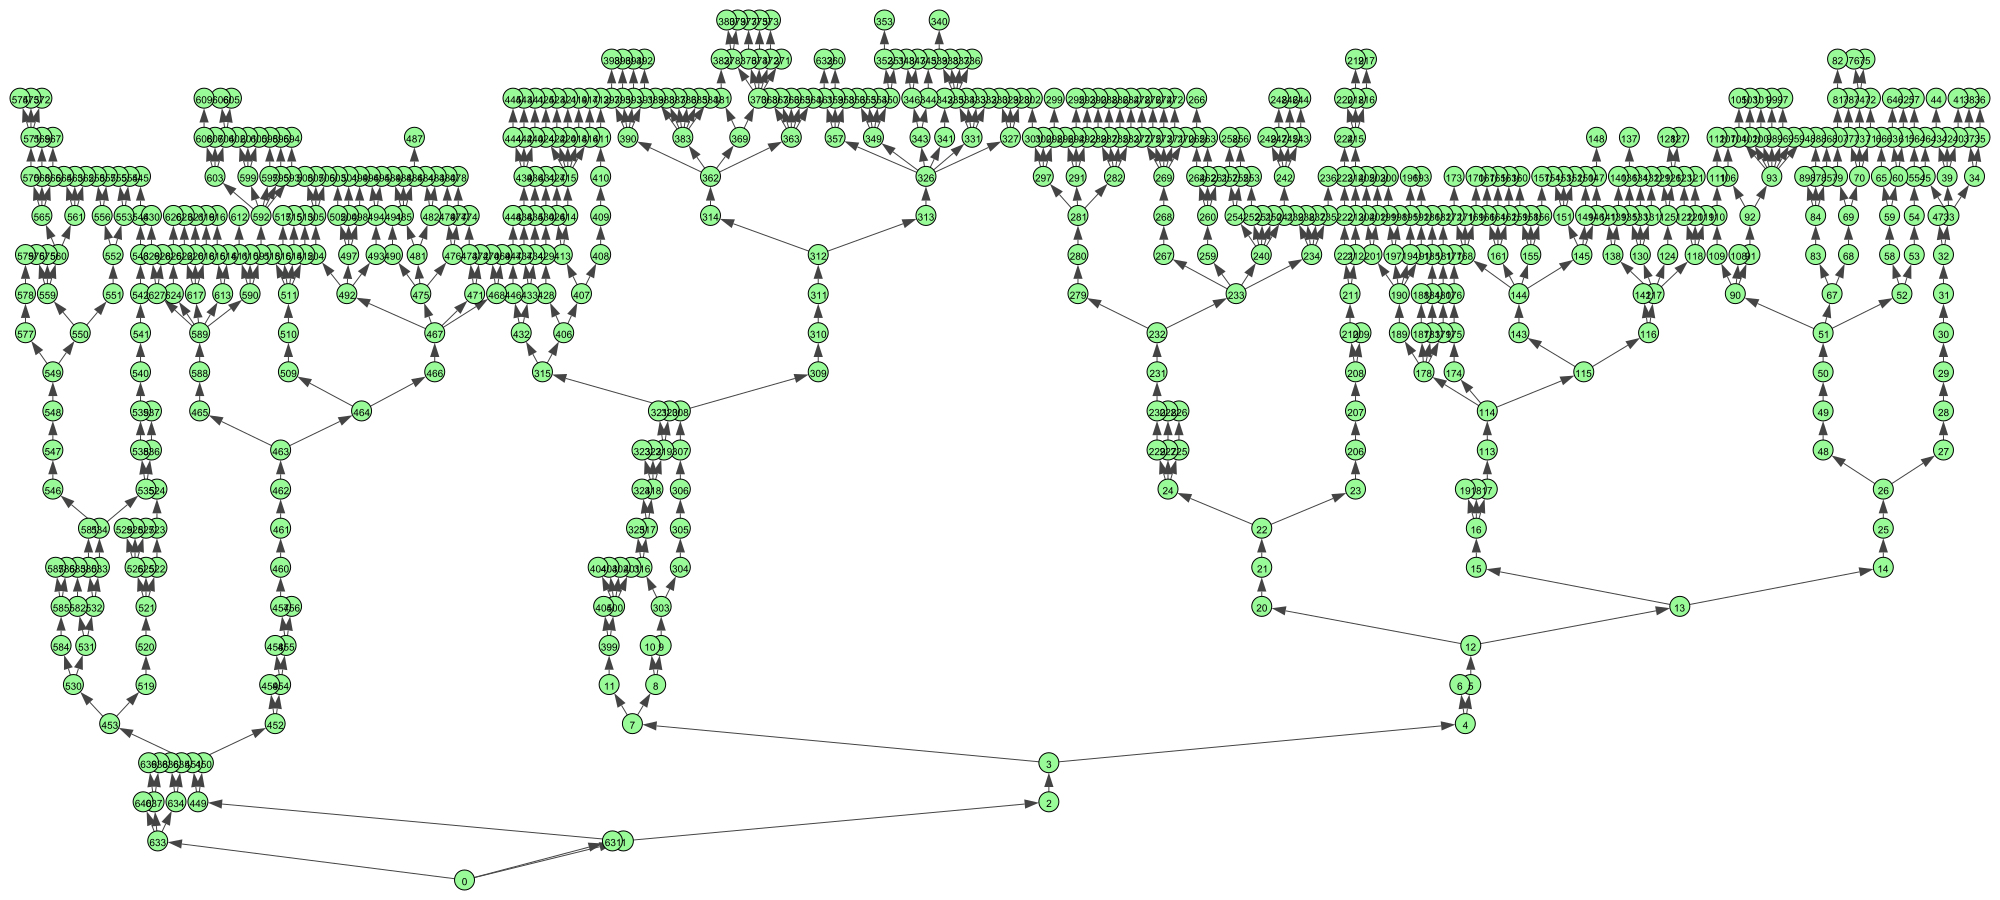

In [13]:
with resources.path('vmlab.data.trees', 'tree_E16_with_radius.csv') as path:
    tree = pd.read_csv(path)
    graph = vmlab.to_graph(tree)
plot_graph_NA_rad(graph, 2000,900)

## TREE G3

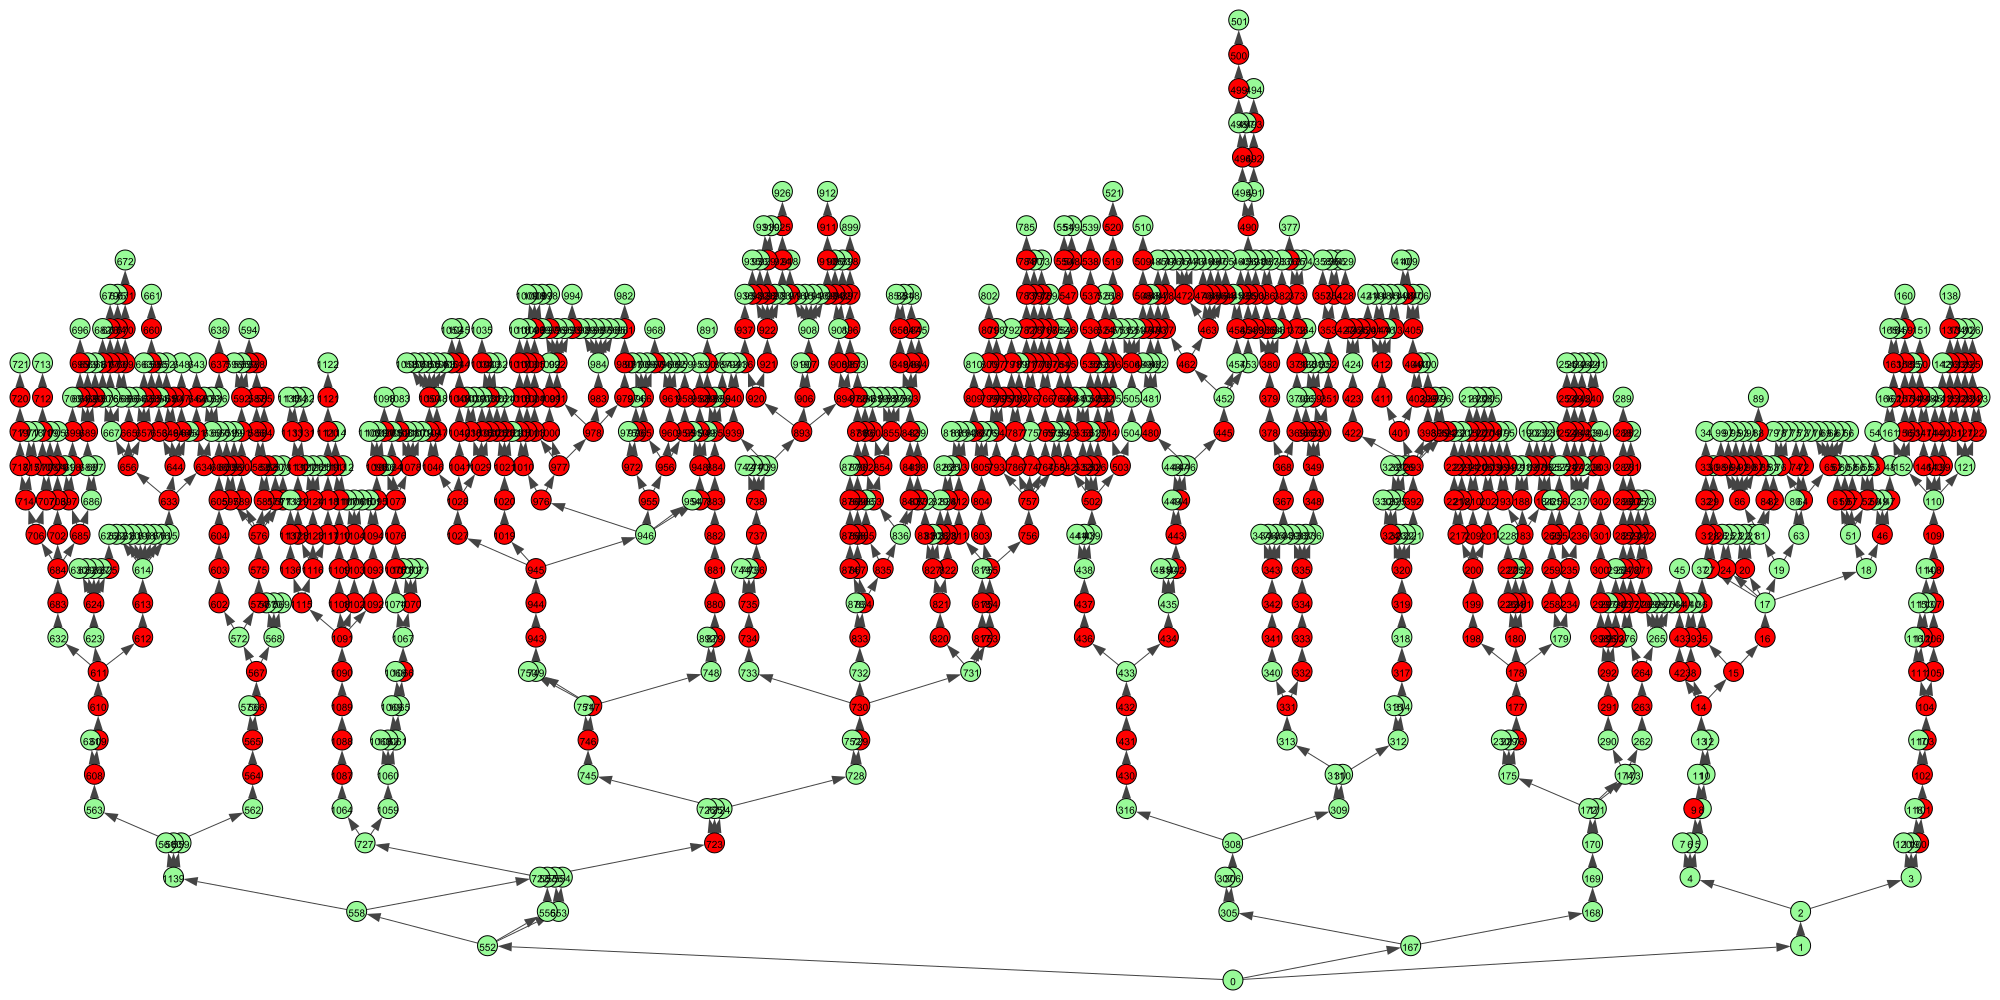

In [14]:
with resources.path('vmlab.data.trees', 'tree_G3_raw.csv') as path:
    tree = pd.read_csv(path)
    graph = vmlab.to_graph(tree)
plot_graph_NA_rad(graph,2000,1000)

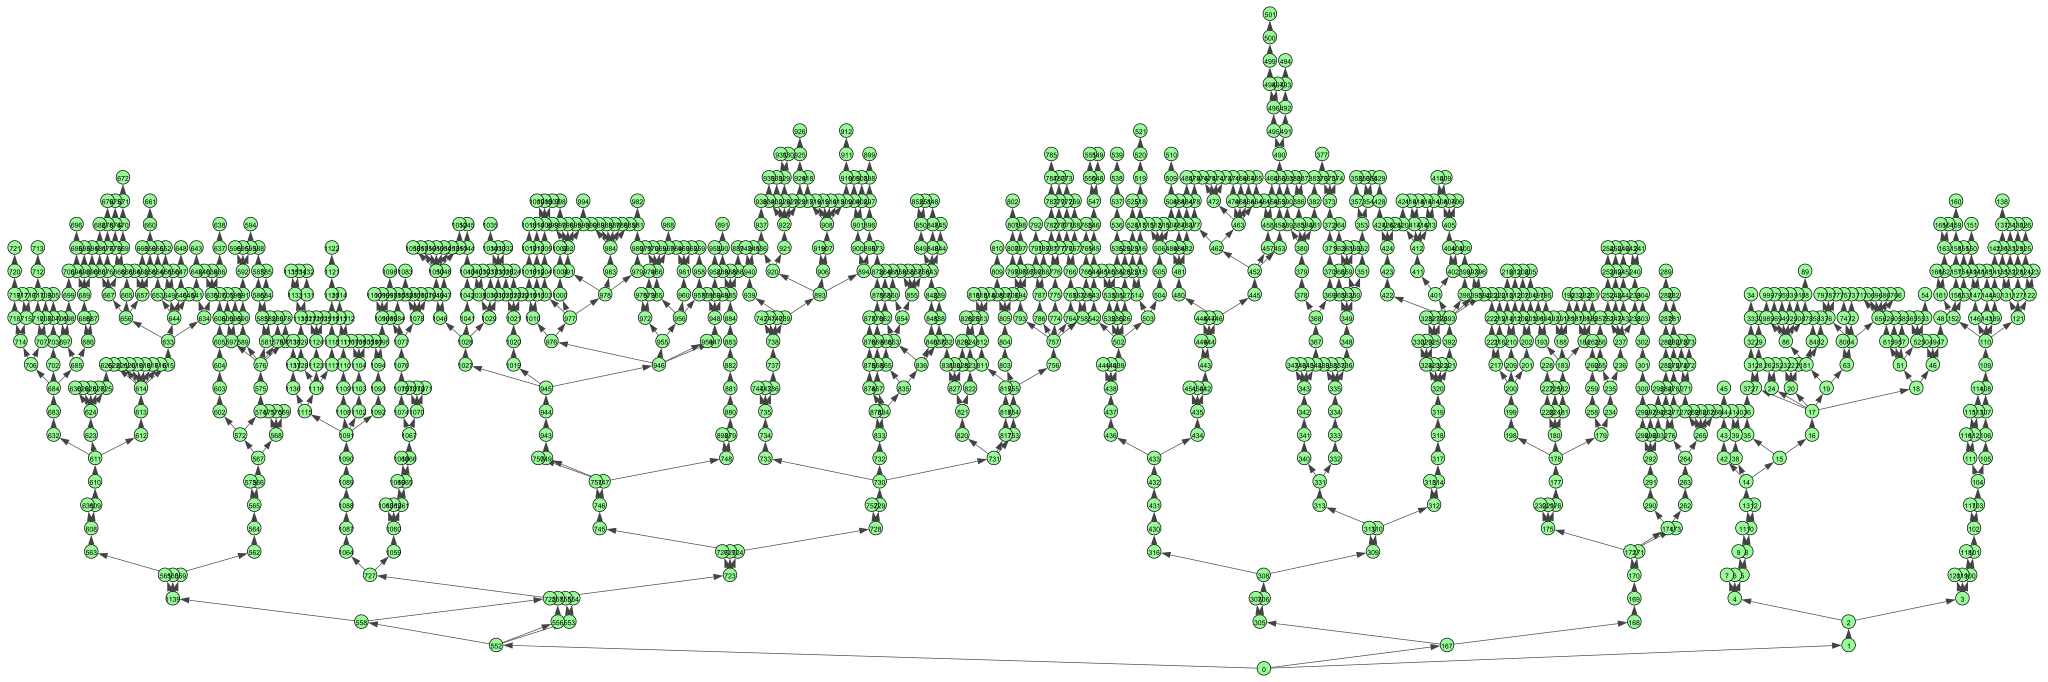

In [15]:
with resources.path('vmlab.data.trees', 'tree_G3_with_radius.csv') as path:
    tree = pd.read_csv(path)
    graph = vmlab.to_graph(tree)
plot_graph_NA_rad(graph,3000,1000)